# <a href="https://mipt-stats.gitlab.io/courses/ad_fivt.html">Введение в анализ данных</a>
## Домашнее задание 4. Регрессия и классификация. <font color="blue"><i>Легкая часть</i></font>


**Правила, <font color="red">прочитайте внимательно</font>:**

* Выполненную работу нужно отправить телеграм-боту `@miptstats_ad21_bot`. Для начала работы с ботом каждый раз отправляйте `/start`. **Работы, присланные иным способом, не принимаются.**
* Дедлайн см. в боте. После дедлайна работы не принимаются кроме случаев наличия уважительной причины.
* Прислать нужно ноутбук в формате ipynb.
* Выполнять задание необходимо полностью самостоятельно. **При обнаружении списывания все участники списывания будут сдавать устный зачет.**
* Решения, размещенные на каких-либо интернет-ресурсах, не принимаются. Кроме того, публикация решения в открытом доступе может быть приравнена к предоставлении возможности списать.
* Для выполнения задания используйте этот ноутбук в качестве основы, ничего не удаляя из него. Можно добавлять необходимое количество ячеек.
* Комментарии к решению пишите в markdown-ячейках.
* Выполнение задания (ход решения, выводы и пр.) должно быть осуществлено на русском языке.
* Если код будет не понятен проверяющему, оценка может быть снижена.
* Никакой код из данного задания при проверке запускаться не будет. *Если код студента не выполнен, недописан и т.д., то он не оценивается.*

**Баллы за задание:**

<b><font color="blue">Легкая часть</font></b> (достаточно на "хор"):
* Задача 1 &mdash; 3 балла
* Задача 2 &mdash; 6 баллов
* Задача 3 &mdash; 2 балла

<b><font color="orange">Сложная часть</font></b> (необходимо на "отл"):
* Задача 4 &mdash; 2 балла
* Задача 5 &mdash; 5 баллов
* Задача 6 &mdash; 5 баллов
* Задача 7 &mdash; 3 балла

Условие <b><font color="orange">сложной части</font></b> расположено по <a href="https://mipt-stats.gitlab.io/courses/ad_fivt/task4_hard.html">ссылке</a>.

### <font color="blue"><i>Легкая часть</i></font>

In [9]:
import warnings
warnings.simplefilter("ignore")

import numpy as np
import scipy.stats as sps
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import animation as animation

sns.set(font_scale=1.6, palette='summer')

### Задача 1.

В этой задаче нужно визуализировать *центральную предельную теорему*. Перед выполнением этой задачи настоятельно рекомендуется посмотреть <a href="https://mipt-stats.gitlab.io/courses/ad_fivt/LLN.html">ноутбук</a> с лекции про закон больших чисел. За использование циклов оценка может быть существенно снижена.

**a).** Пусть $\xi_1, ..., \xi_n$ &mdash; независимые случайные величины из распределения $Exp(\lambda)$. Согласно центральной предельной теореме выполнена сходимость $$Z_n = \frac{X_n - \mathsf{E}X_n}{\sqrt{\mathsf{D}X_n}} \stackrel{d}{\longrightarrow} \mathcal{N}(0, 1),$$ где $X_n = \sum\limits_{i=1}^n \xi_i$. Вам нужно убедиться в этом, сгенерировав множество наборов случайных величин и посчитав по каждому из наборов величину $Z_n$ в зависимости от размера набора. 

Сгенерируйте 500 наборов случайных величин $\xi_1^j, ..., \xi_{300}^j$ из распределения $Exp(1)$. По каждому из них посчитайте сумму $X_{jn} = \sum\limits_{i=1}^n \xi_i^j$ для $1 \leqslant n \leqslant 300$, то есть сумма первых $n$ величин $j$-го набора. Для этого среднего посчитайте величину $$Z_{jn} = \frac{X_{jn} - \mathsf{E}X_{jn}}{\sqrt{\mathsf{D}X_{jn}}}.$$
Обратите внимание, что нужно взять теоретические математическое ожидание и дисперсию, а не вычислять их по выборке.

In [43]:
n = 300
sz = 500

def get_z(distr):
    '''Функция генерирует выборку сл величин кси. Принимает распределение и возвращает зеты'''
    ksi = distr.rvs(size=(sz, n))
    x = ksi.cumsum(axis=1)

    expect, disp = distr.stats()

    expects = np.full((sz, n), expect).cumsum(axis=1)
    
    disps = np.full((sz, n), disp).cumsum(axis=1)

    return (x - expects) / np.sqrt(disps)

Для каждого $j$ нанесите на один график зависимость $Z_{jn}$ от $n$. Каждая кривая должна быть нарисована *одним цветом* с прозрачностью `alpha=0.05`. Сходятся ли значения $Z_{jn}$ к какой-либо константе?

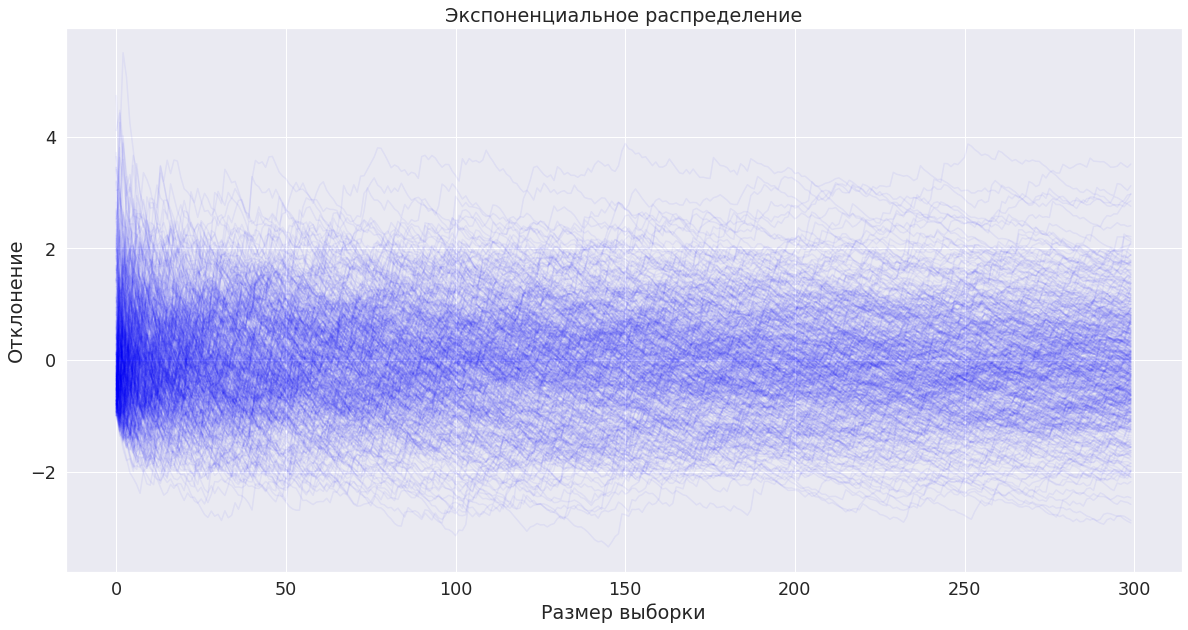

In [44]:
expon = get_z(sps.expon)
plt.figure(figsize=(20,10))

plt.title('Экспоненциальное распределение')

for j in expon:
    plt.plot(j, alpha=0.05, color='blue')

plt.xlabel("Размер выборки")
plt.ylabel("Отклонение")
plt.show()

**Вывод** Нет, по графику достаточно хорошо видно что значения $Z_{j,n}$ не сходятся ни к какой константе, да и из курса теории вероятностей знаем, что не должны, должны стремится к нормальному распределени, посмотрим на следующий график.

Для $n=300$ по набору случайных величин $Z_{1,300}, ..., Z_{500,300}$ постройте гистограмму. Похожа ли она на плотность распределения $\mathcal{N}(0, 1)$, которую тоже постройте на том же графике? Не забудьте сделать легенду.

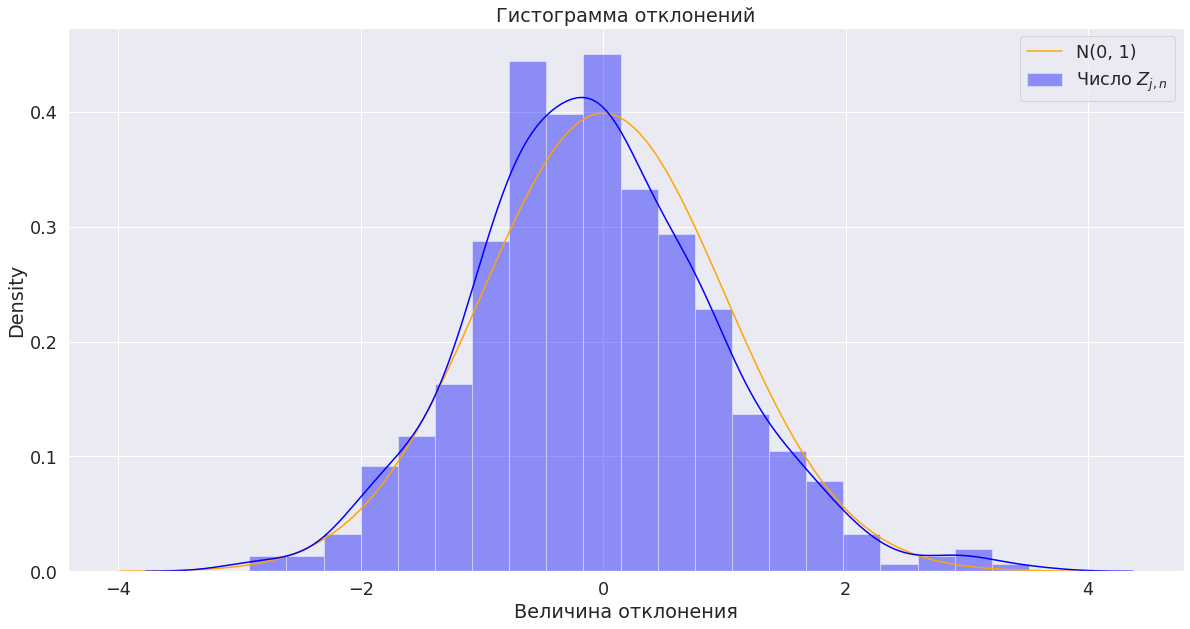

In [45]:
plt.figure(figsize=(20, 10))

grid = np.linspace(-4, 4, 100)

plt.plot(
    grid,
    sps.norm.pdf(grid),
    label='N(0, 1)', 
    color = 'orange'
)


sns.distplot(
    expon[:, -1],
    label='Число $Z_{j, n}$',
    color='blue'
)

plt.title('Гистограмма отклонений')
plt.xlabel('Величина отклонения')

plt.legend()
plt.show()

Да, похожа, очень даже. $Z_{j,n}$ по факту отклонения, только нормаированные, поэтому так их и будем называть. Проверим это свойство для других распределений.

**b).** Выполните те же действия для распределений $U(0, 1)$ и $Pois(1)$.

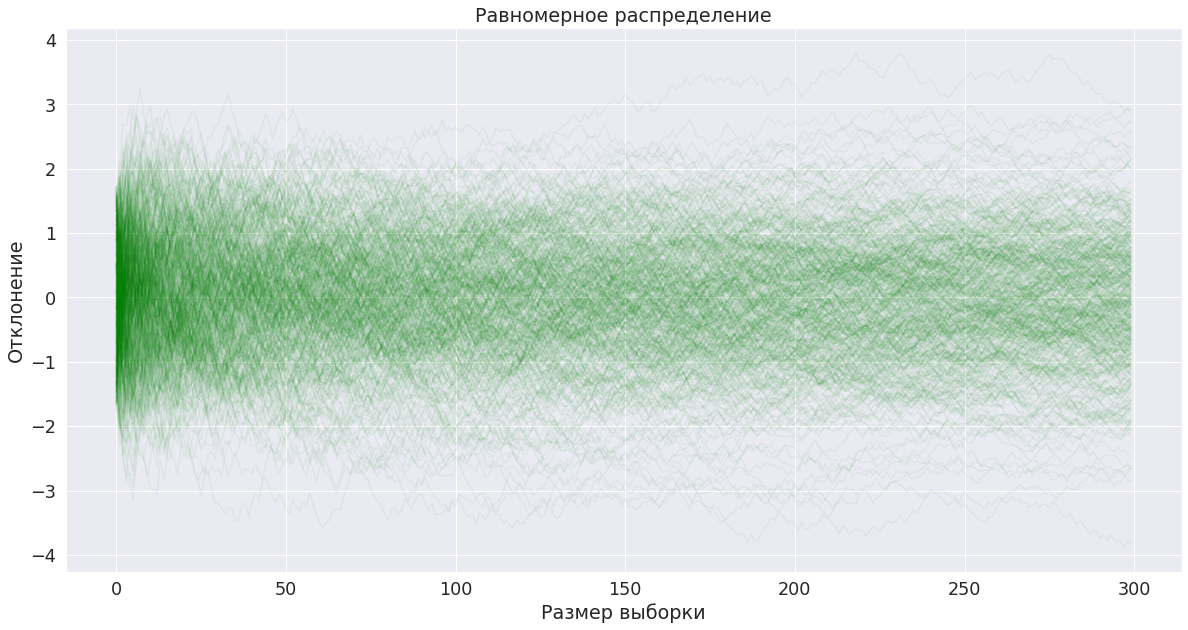

In [46]:
uniform = get_z(sps.uniform)
plt.figure(figsize=(20,10))

plt.title('Равномерное распределение')

for j in uniform:
    plt.plot(j, alpha=0.05, color='green')

plt.xlabel("Размер выборки")
plt.ylabel("Отклонение")
plt.show()

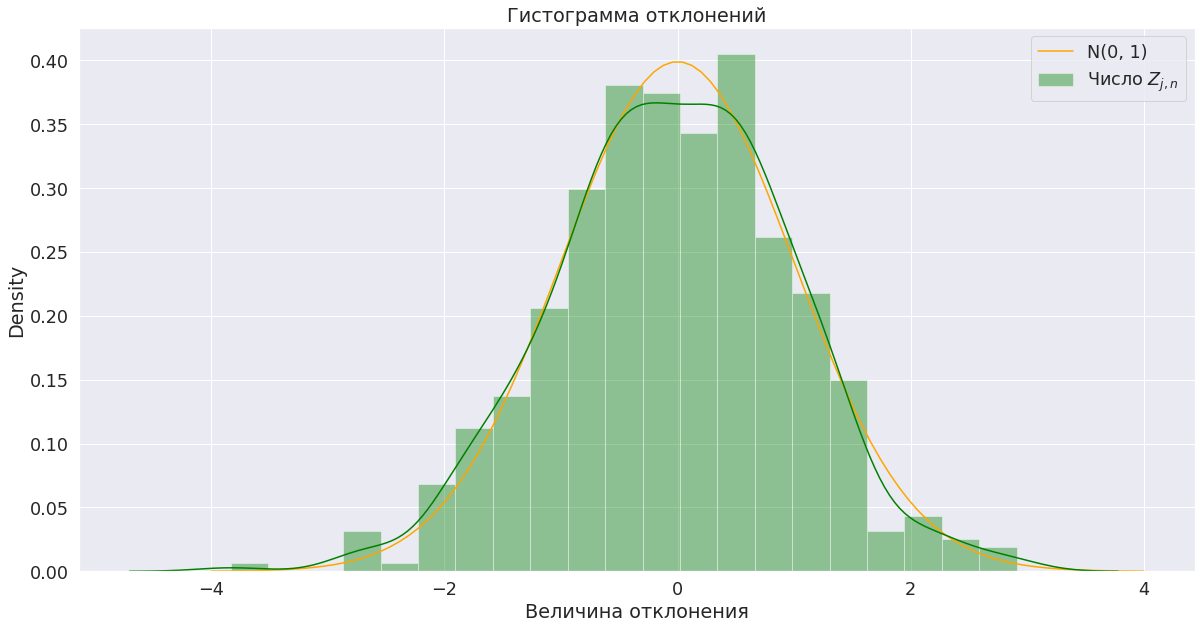

In [47]:
plt.figure(figsize=(20, 10))

grid = np.linspace(-4, 4, 100)

plt.plot(
    grid,
    sps.norm.pdf(grid),
    label='N(0, 1)', 
    color = 'orange'
)


sns.distplot(
    uniform[:, -1],
    label='Число $Z_{j, n}$',
    color='green'
)

plt.title('Гистограмма отклонений')
plt.xlabel('Величина отклонения')

plt.legend()
plt.show()

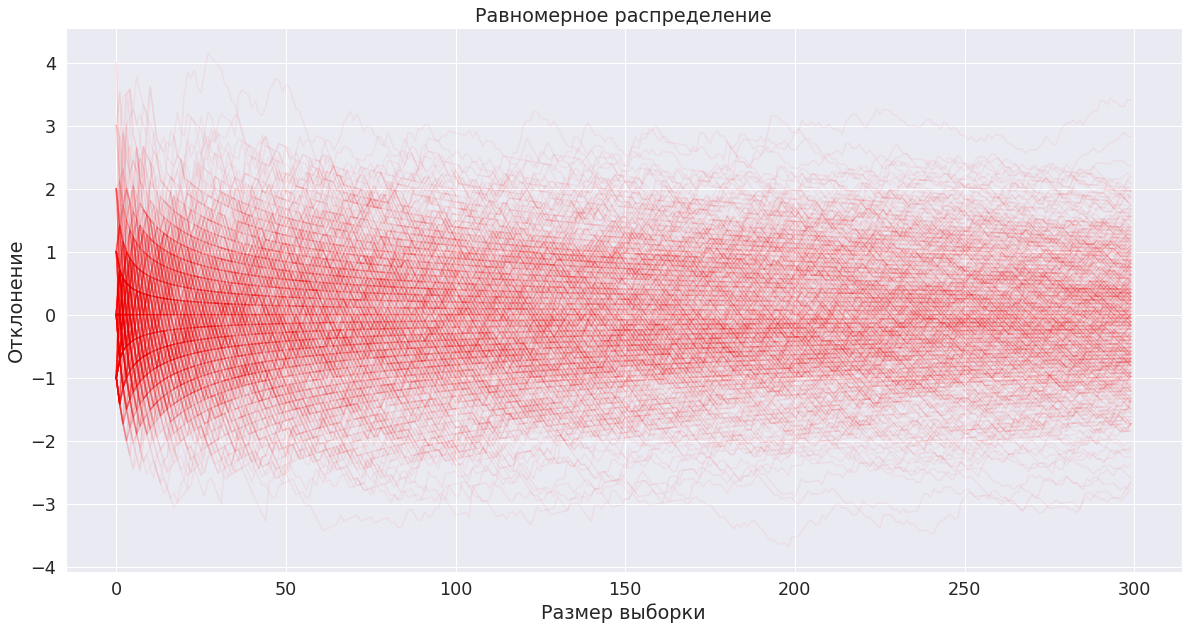

In [48]:
pois = get_z(sps.poisson(1))
plt.figure(figsize=(20,10))

plt.title('Равномерное распределение')

for j in pois:
    plt.plot(j, alpha=0.05, color='red')

plt.xlabel("Размер выборки")
plt.ylabel("Отклонение")
plt.show()

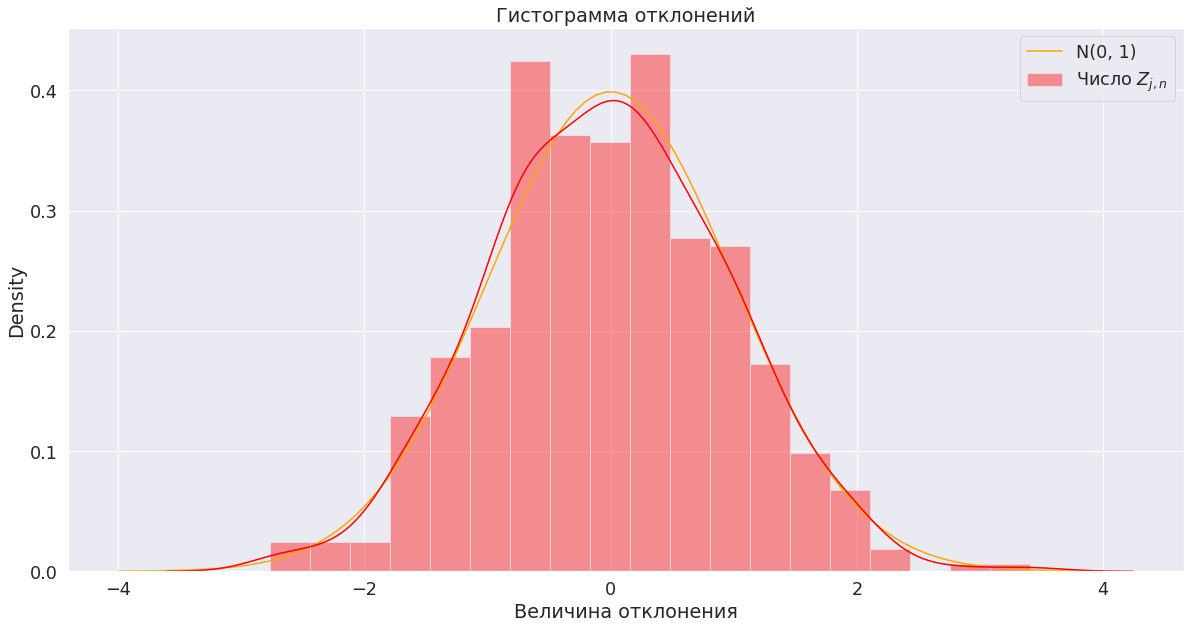

In [49]:
plt.figure(figsize=(20, 10))

grid = np.linspace(-4, 4, 100)

plt.plot(
    grid,
    sps.norm.pdf(grid),
    label='N(0, 1)', 
    color = 'orange'
)


sns.distplot(
    pois[:, -1],
    label='Число $Z_{j, n}$',
    color='red'
)

plt.title('Гистограмма отклонений')
plt.xlabel('Величина отклонения')

plt.legend()
plt.show()

Сделайте вывод о смысле центральной предельной теоремы. Подтверждают ли сделанные эксперименты теоретические свойства?

Рекомендуем также посмотреть <a target="_blank" href="https://www.zoology.ubc.ca/~whitlock/Kingfisher/CLT.htm">интерактивную визуализацию</a>.

**Вывод**: Наше предположение и теоретический вывод теоремы подтвердился, центральная предельная теорема работает, она показывает, что случайная величина не может сильно отклоняться от своего математического ожидания, а построенные графики подтверждают, что нормированные отклонения имеют вид стандартного нормального распределения.

### Задача 2.

Скоро лето &mdash; идеальное время года для путешествий и прогулок по городу на велосипедах. В крупных городах обычно развиты сети проката велосипедов, предоставляющие удобный сервис. Одной из важных задач таких компаний является прогнозирование количества арендованных велосипедов в зависимости от времени года и погодных условий.

Рассмотрим датасет <a target="_blank" href="https://archive.ics.uci.edu/ml/datasets/Bike+Sharing+Dataset">Bike Sharing Dataset</a> от компании <a target="_blank" href="https://www.capitalbikeshare.com/">Capital Bikeshare</a>, располагающей автоматизированными пунктами проката велосипедов в ряде городов США. В датасете по дням записаны календарная информация и погодные условия, а также число прокатов в этот день. Цель &mdash; предсказать количество арендованных велосипедов по остальным характеристикам.

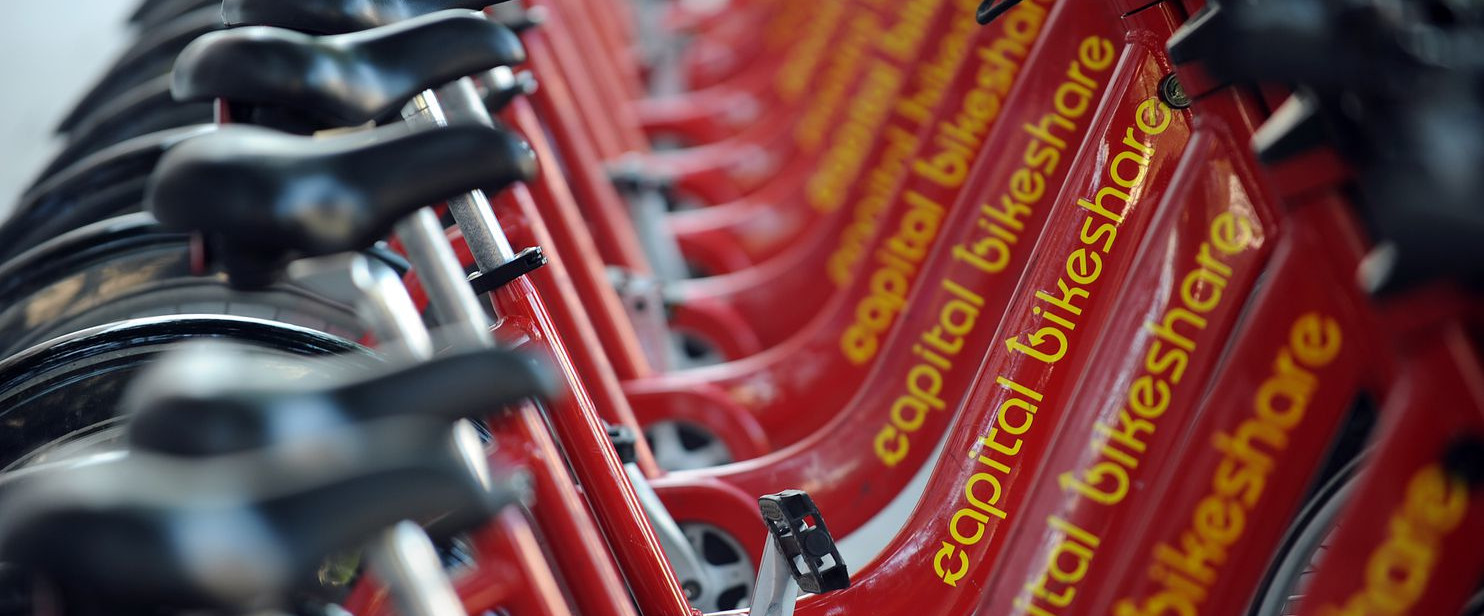

Будем работать только со следующими признаками:
* `season`: время года: 1 &mdash; весна, 2 &mdash; лето, 3 &mdash; осень, 4 &mdash; зима;
* `mnth`: месяц от 1 до 12;
* `holiday`: является ли текущий день праздничным;
* `weekday`: день недели от 0 до 6;
* `workingday`: является ли текущий день рабочим или выходным;
* `weathersit`: оценка благоприятности погоды от 1 (чистый, ясный день) до 4 (ливень, туман);
* `temp`: температура в Цельсиях;
* `atemp`: температура по ощущениям в Цельсиях;
* `hum`: влажность воздуха;
* `windspeed`: скорость ветра;
* `cnt`: количество арендованных велосипедов в текущий день.

Перед выполнением задания обязательно посмотрите <a href="https://mipt-stats.gitlab.io/courses/ad_fivt/linreg_sklearn.html">ноутбук</a> с занятия по линейной регрессии.

---

Скачайте данные, загрузите их с помощью `pandas` и разделите на обучающую и тестовую части в соотношении 4:1. Далее всю аналитику необходимо проводить только на обучающей части данных.

In [10]:
import numpy as np
import pandas as pd
pd.options.mode.chained_assignment = None

import matplotlib.pyplot as plt
import seaborn as sns
sns.set(font_scale=1.3, palette='Set2')

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [3]:
dataset_bike = pd.read_csv('day.csv')
dataset_bike = dataset_bike[['season', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit', 
             'temp', 'atemp', 'hum', 'windspeed', 'cnt']]
dataset_bike

season  mnth  holiday  weekday  workingday  weathersit      temp  \
0         1     1        0        6           0           2  0.344167   
1         1     1        0        0           0           2  0.363478   
2         1     1        0        1           1           1  0.196364   
3         1     1        0        2           1           1  0.200000   
4         1     1        0        3           1           1  0.226957   
..      ...   ...      ...      ...         ...         ...       ...   
726       1    12        0        4           1           2  0.254167   
727       1    12        0        5           1           2  0.253333   
728       1    12        0        6           0           2  0.253333   
729       1    12        0        0           0           1  0.255833   
730       1    12        0        1           1           2  0.215833   

        atemp       hum  windspeed   cnt  
0    0.363625  0.805833   0.160446   985  
1    0.353739  0.696087   0.248539   801  
2    0.189405  0.437273   0.248309  1349  
3    0.212122  0.590435   0.160296  1562  
4    0.229270  0.436957   0.186900  1600  
..        ...       ...        ...   ...  
726  0.226642  0.652917   0.350133  2114  
727  0.255046  0.590000   0.155471  3095  
728  0.242400  0.752917   0.124383  1341  
729  0.231700  0.483333   0.350754  1796  
730  0.223487  0.577500   0.154846  2729  

[731 rows x 11 columns]

In [4]:
train, test = train_test_split(dataset_bike, test_size=0.2)
train.shape, test.shape

((584, 11), (147, 11))

Посмотрите по графикам, как целевой признак зависит от остальных и поймите характер зависимости целевого признака от остальных.  

In [5]:
target_feature = 'cnt'  # целевой признак
categorial_features = ['season', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit']  # категориальные признаки
real_features = ['temp', 'atemp', 'hum', 'windspeed']  # вещественные признаки

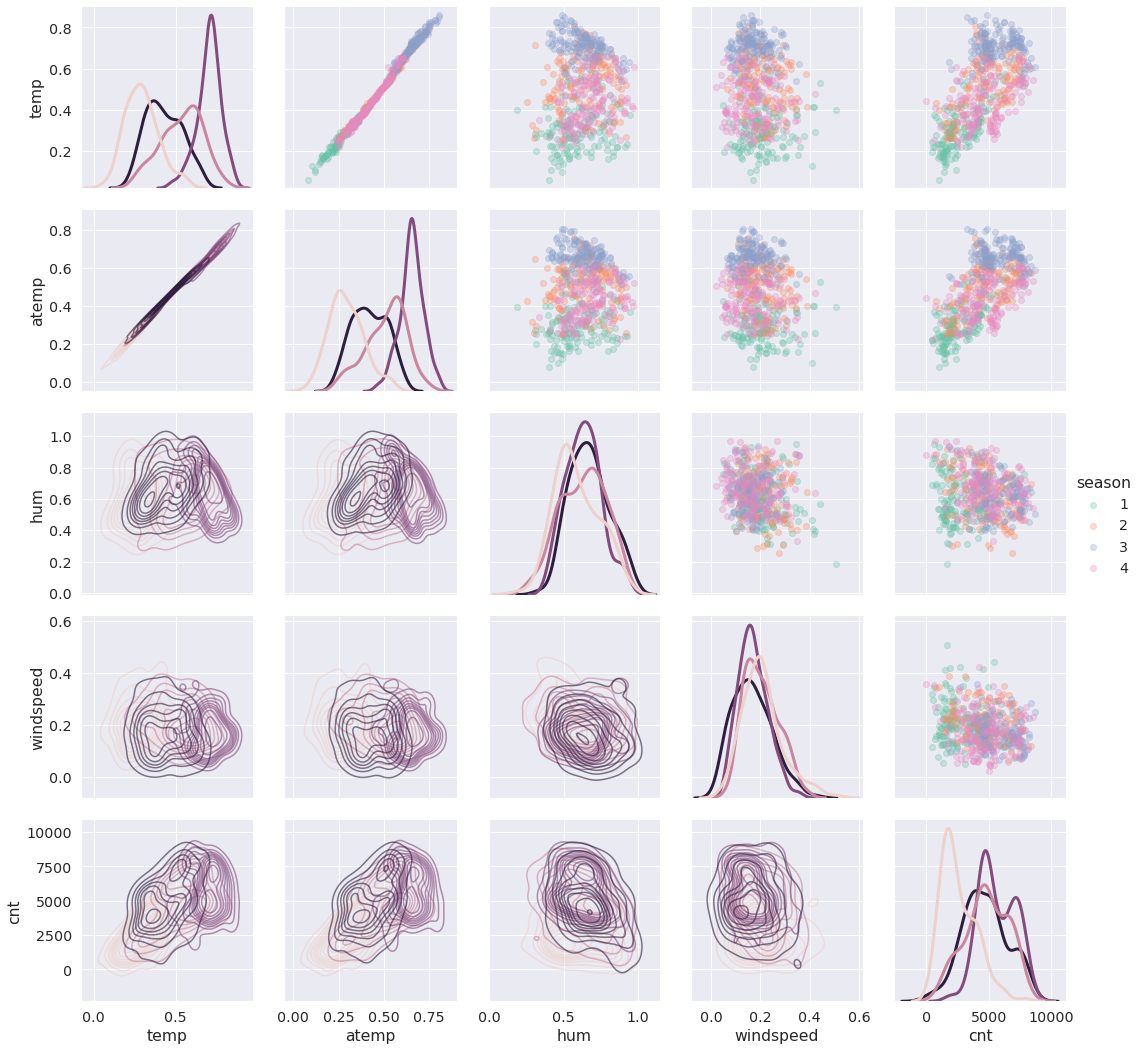

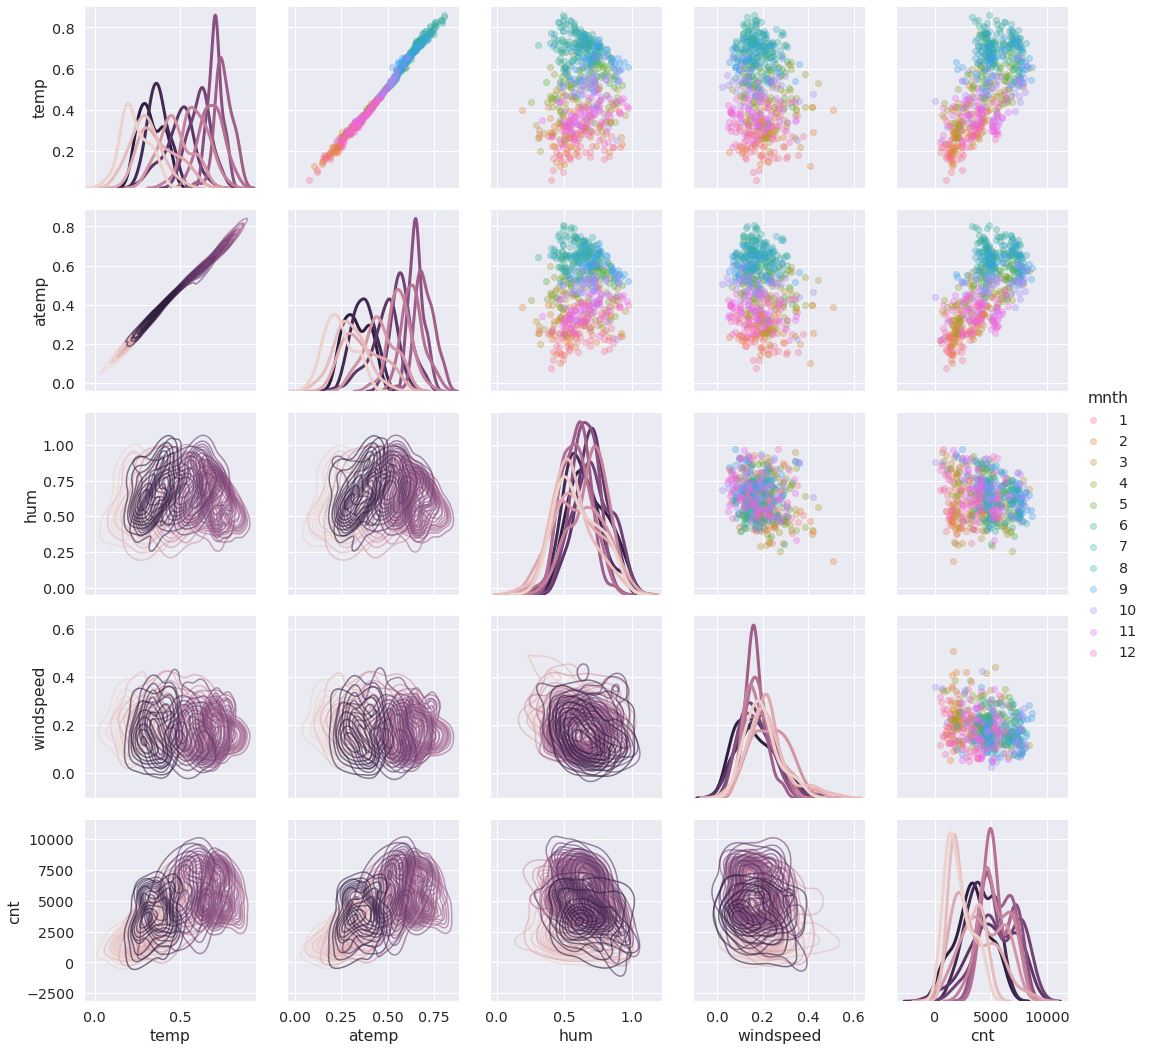

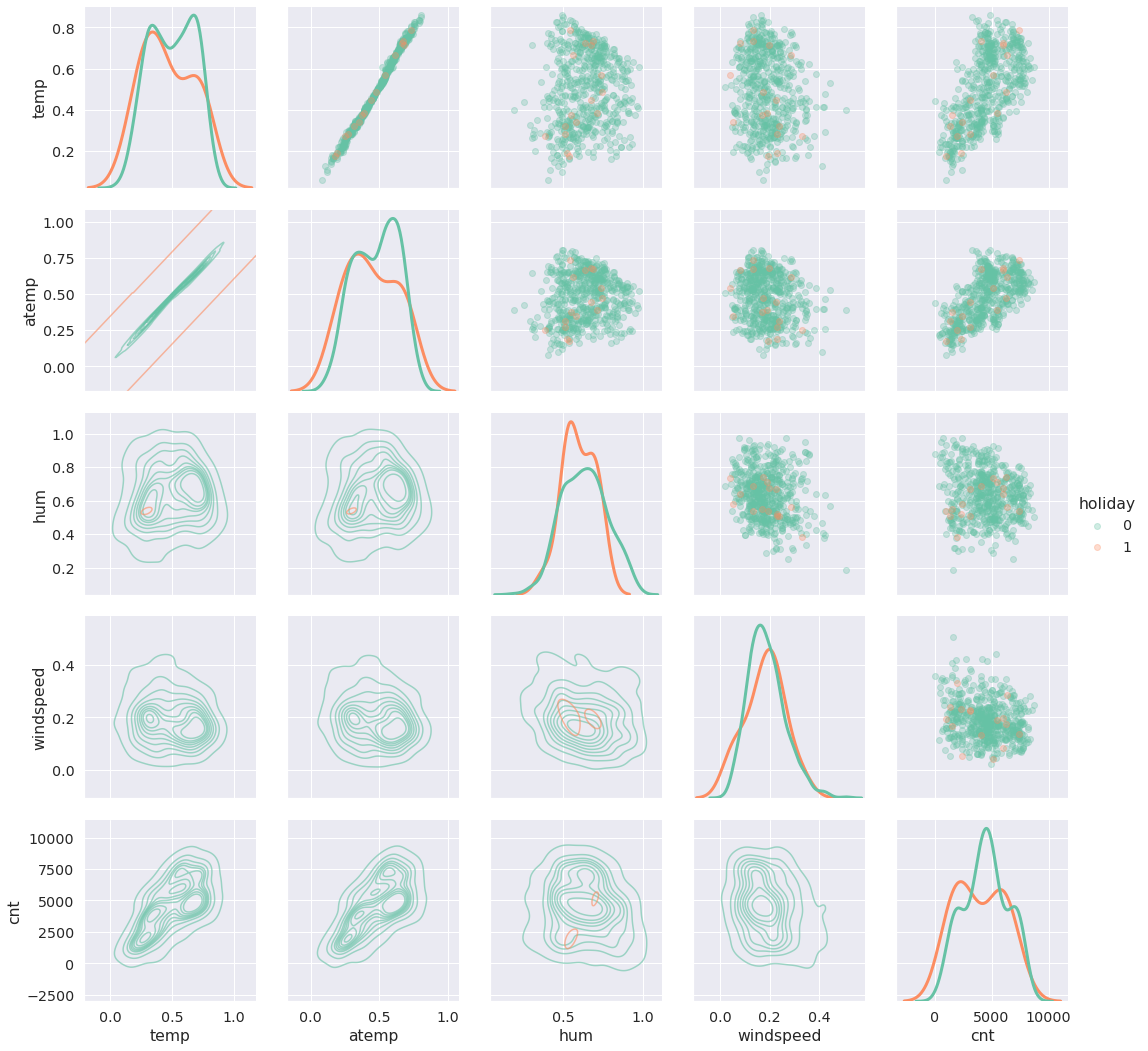

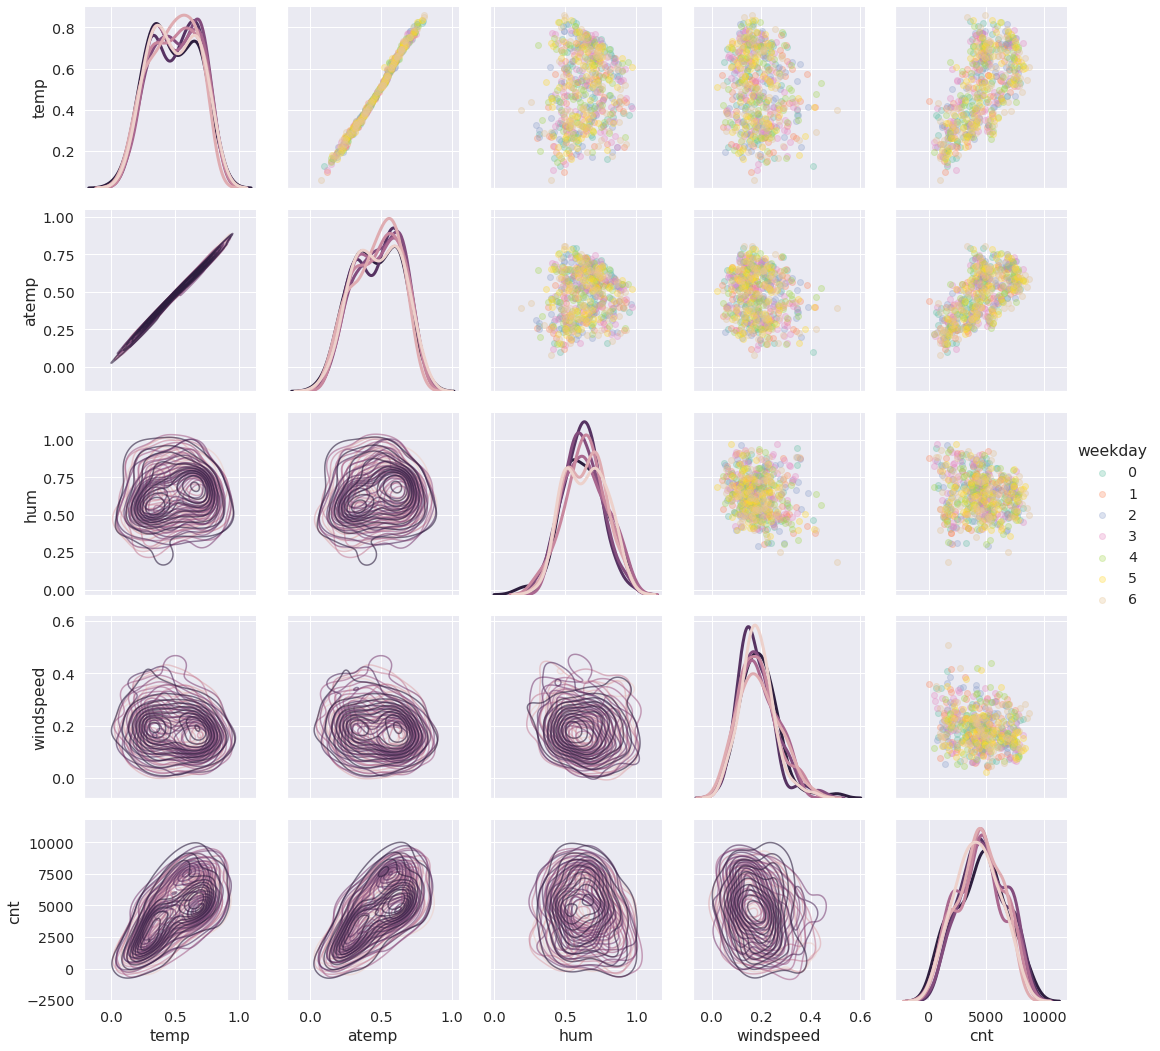

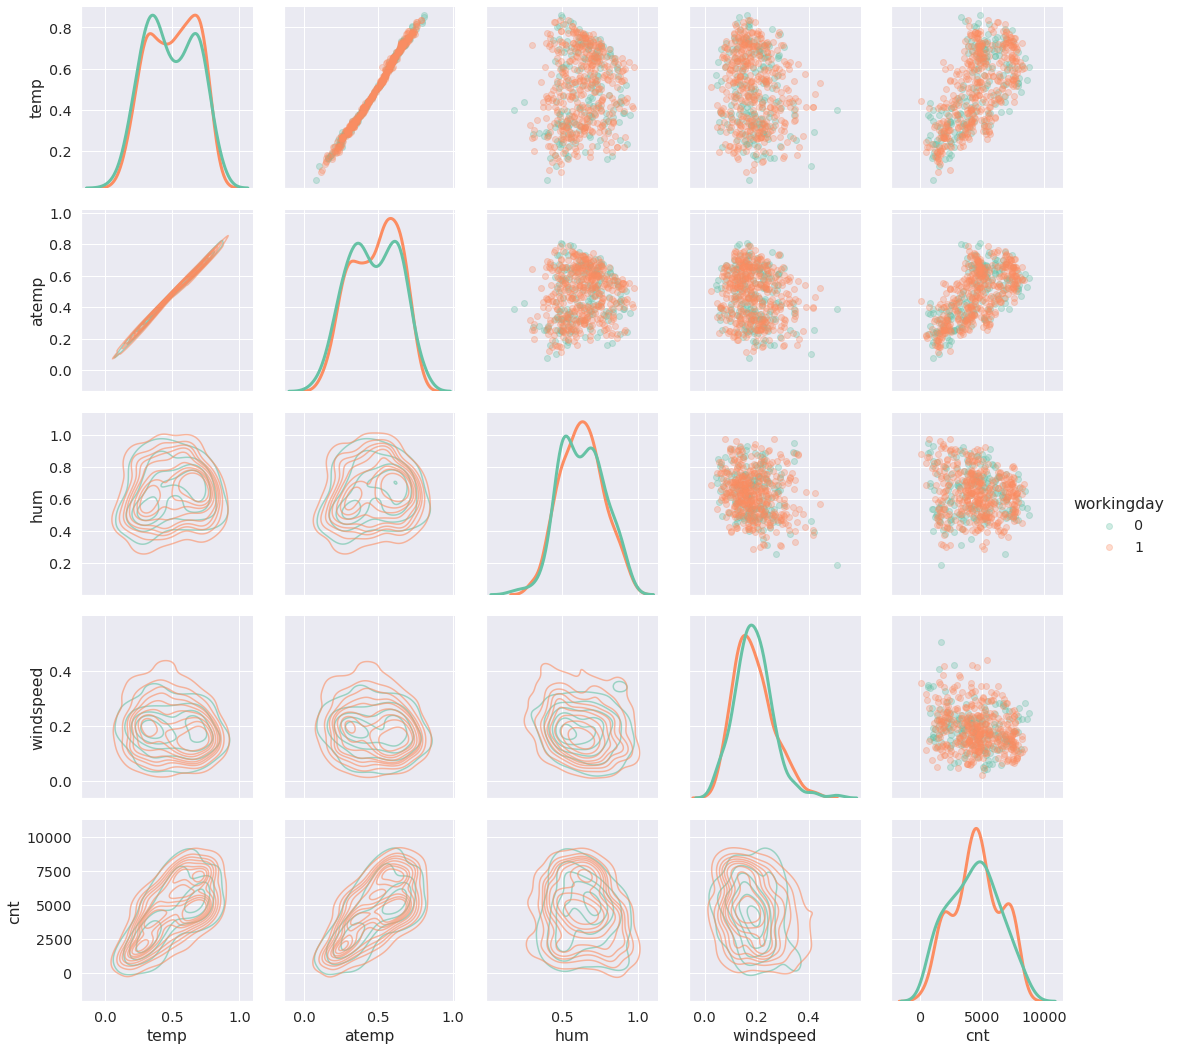

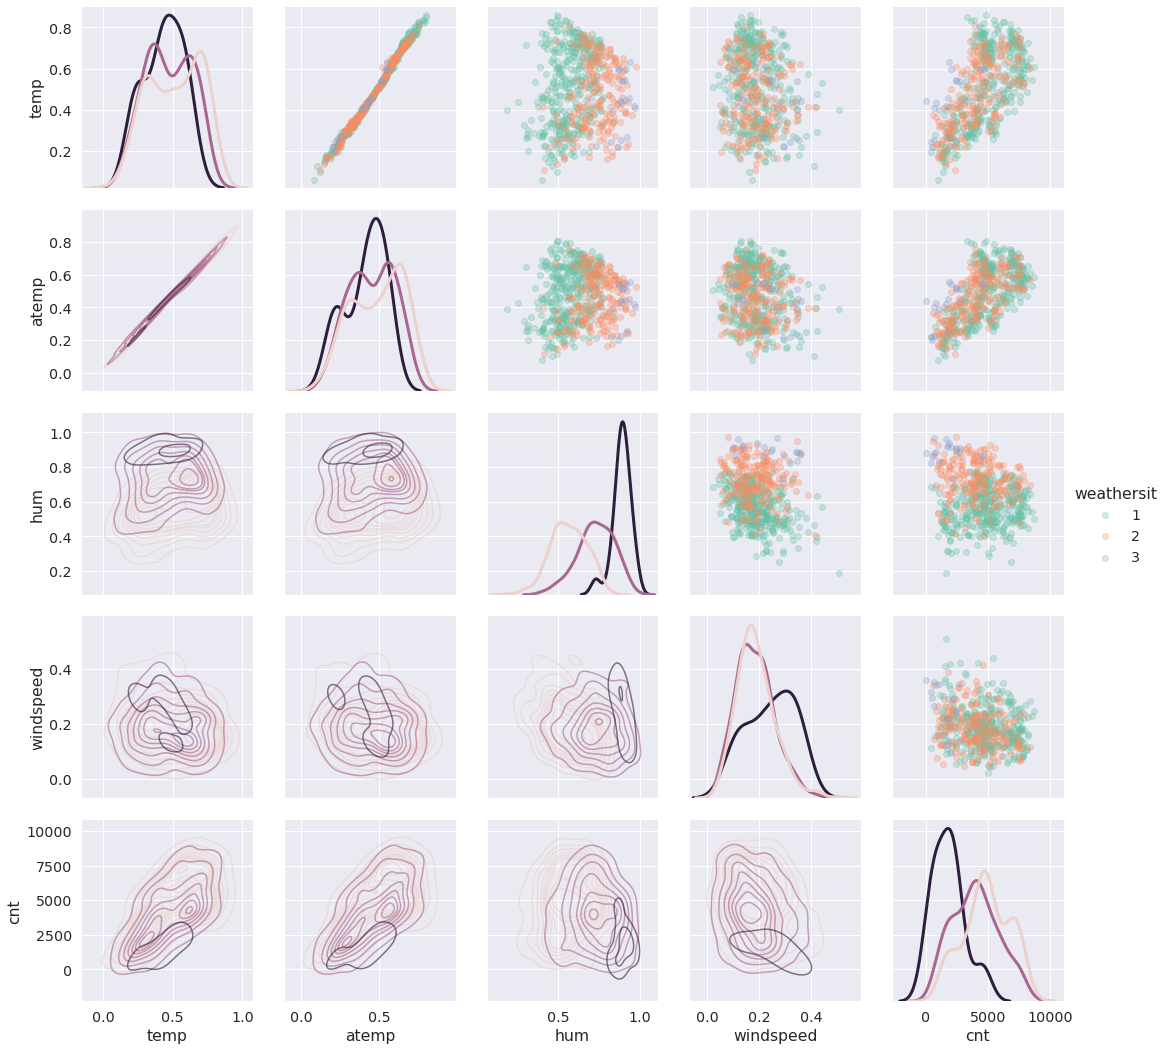

In [6]:
for hue in categorial_features:
    g = sns.PairGrid(train[['temp', 'atemp', 'hum', 'windspeed', 'cnt' , hue]], 
                     hue=hue, diag_sharey=False, height=3)
    
    g.map_lower(sns.kdeplot, alpha=0.6)
    g.map_upper(plt.scatter, alpha=0.3)
    g.map_diag(sns.kdeplot, lw=3, alpha=0.6, 
               common_norm=False)  # каждая плотность поотдельности должна давать 1 при интегрировании
    
    g.add_legend()

Какие признаки категориальные, а какие &mdash; вещественные? Что нужно сделать с категориальными признаками? Выполните это. При необходимости можно сделать несложную обработку вещественных признаков.

**Выводы**: Проанализируем $6 \cdot 25$ графиков...
В первой группе, где цветом показаны сезоны, видна явная зависимость температуры от температуры по ощущениям, как и во всех других группах они примерно равны. Также вижно, что в температура меняется от сезона к сезону, что тоже совсем не удивительно, зимой холоднее, чем летом. Зеленйы цвет показывает зиму, синий -- лето, оранжевй осень. Видна прамая зависимость количества арендованнх велосипедов от температуры, причем в каждом сезоне. Также видно, что максимальное число велосипедов в среднем арендуют, конечно же, летом, а наименьшее -- зимой. Присутпая к анализу следующего графика, мы видим, что максимум аренды велосипедов приходится на июлб-август, минимум -- на январь. Все остальные графики похожи на предыдущие, так как каждый месяц просто попадает в какой-то из 4 сезонов.

Интересна зависиомтьс в 3 группе графиков, в ней можно увидеть, что плотность распределения аренды велоспедов в выходные смещена влево относительно будних дней, значит в среднем в будние берут велосипеды чаще.
4 группа кажется не очень информативной из-за огромного количества цветов.
5 группа повторяет 3.
В последней группе заметно, что при благоприятных условиях велосипеды арендуют чаще, также, что туманность сильно влияет на оценку погоды человеком, гораздо меньше, чем температура.

Обучите линейную регрессию из `sklearn` на наших данных и посмотрите на полученные оценки коэффициентов.

In [7]:
encoder = OneHotEncoder(drop='first', sparse=False)  # объявляем модель
train_bike = encoder.fit_transform(train[categorial_features])  # обучаем и кодируем
train_bike

array([[1., 0., 0., ..., 1., 1., 0.],
       [0., 1., 0., ..., 0., 1., 0.],
       [1., 0., 0., ..., 1., 1., 0.],
       ...,
       [0., 1., 0., ..., 1., 0., 0.],
       [0., 1., 0., ..., 1., 0., 0.],
       [1., 0., 0., ..., 1., 0., 0.]])

In [8]:
encoder.categories_

[array([1, 2, 3, 4]),
 array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12]),
 array([0, 1]),
 array([0, 1, 2, 3, 4, 5, 6]),
 array([0, 1]),
 array([1, 2, 3])]

In [9]:
X_train = np.hstack([train[real_features], train_bike])

In [10]:
model = LinearRegression(fit_intercept=True)  # объявляем модель
model.fit(X_train, train[target_feature])  # обучаем

LinearRegression()

In [11]:
model.coef_

array([-5.35771290e+03,  1.32538748e+04, -3.64425375e+03, -3.07737551e+03,
        6.80285763e+02,  6.48605050e+02,  1.40226332e+03,  1.53619769e+01,
        2.65561977e+02,  1.02112484e+02,  4.21511070e+02, -2.49075233e+02,
       -6.42672811e+02, -8.53109322e+01,  7.62120585e+02,  3.20119924e+02,
       -2.76646399e+02, -1.86779192e+02, -1.63311744e+02,  2.01999788e+01,
       -5.41400574e+00,  2.21876039e+01,  3.29272144e+01,  6.10119107e+01,
        4.41811285e+02,  2.94224446e+02, -1.58893679e+02, -1.49714399e+03])

Посчитайте ошибку предсказания на тестовой выборке по метрикам RMSE, MAE, MAPE.

In [12]:
# Кодируем категориальные признаки с помощью метода transform обученного ранее кодировщика
test_bike = encoder.transform(test[categorial_features])

# Соединяем данные
X_test = np.hstack([test[real_features], test_bike])

In [13]:
test_preds = model.predict(X_test)

In [14]:
# MAPE metrics
def mean_absolute_percentage_error(y_true, y_pred):
    return 100 * (np.abs(y_true - y_pred) / y_true).mean()

In [15]:
print("RMSE на тестовой выборке: {}".format(round(metrics.mean_squared_error(test[target_feature], test_preds) ** 0.5, 3)))
print("MAE на тестовой выборке: {}".format(round(metrics.mean_absolute_error(test[target_feature], test_preds), 3)))
print("MAPE на тестовой выборке: {} %".format(round(mean_absolute_percentage_error(test[target_feature], test_preds), 3)))

RMSE на тестовой выборке: 1442.434
MAE на тестовой выборке: 1162.373
MAPE на тестовой выборке: 32.927 %


Попробуйте посчитать оценку коэффициентов с помощью формулы, полученной на занятии. В чем заключается проблема?

*Подсказка.* Подумайте о зависимостях между признаками.

*Формула*, полученная на занятии выглядит так: $\theta = (X^{T}X)^{-1}X^{T}Y$

In [16]:
Theta = np.linalg.inv(X_train.T @ X_train) @ X_train.T @ train[target_feature] 
Theta

array([ 5.83649920e+05, -5.76141215e+05, -4.23746409e+03,  2.09702924e+04,
        6.49767592e+03, -7.04778590e+03, -1.80525013e+04, -1.13317086e+04,
       -1.08502689e+04, -1.54005384e+04, -3.57028522e+04, -3.13150427e+04,
       -2.62684697e+04, -1.87925695e+04, -1.27007627e+04,  1.63872086e+03,
        2.20050806e+04,  3.18331609e+04, -5.03599998e+04,  4.20461862e+04,
        3.85113305e+04,  3.42366952e+04,  4.37894094e+04,  3.48798459e+04,
        7.72873839e+02, -3.79068697e+04, -3.96542290e+02, -2.14154804e+03])

In [17]:
print("RMSE на тестовой выборке через матрицу: {}".format(round(metrics.mean_squared_error(test[target_feature], X_test @ Theta) ** 0.5, 3)))

RMSE на тестовой выборке через матрицу: 25895.712


Проблема заключается в том, что многие параментры зависимы. Условно параметр, показывающий реальную температуру и параментр, отвечающий за температуру по ощущениям. Сезон и месяц, выходной ли день и тд. Понятно, что sklearn внутри как-то оптимизирует вычисление и не учитывает лишнее. Для решения этой проблемы нужно избавиться от конкурирующих между собой признаков. 

Исправьте эту проблему, посчитайте оценки коэффициентов, а также ошибку предсказания.

Выберем независимые из здравого смысла признаки. Уберем месяц, темепратуру по ощущениям, праздник.

In [18]:
better_categorial_features = ['season', 'workingday', 'weathersit']  # категориальные признаки
better_real_features = ['temp', 'hum', 'windspeed']  # вещественные признаки

In [19]:
better_train_bike = encoder.fit_transform(train[better_categorial_features])  # обучаем и кодируем
better_train_bike

array([[1., 0., 0., 1., 1., 0.],
       [0., 1., 0., 0., 1., 0.],
       [1., 0., 0., 1., 1., 0.],
       ...,
       [0., 1., 0., 1., 0., 0.],
       [0., 1., 0., 1., 0., 0.],
       [1., 0., 0., 1., 0., 0.]])

In [20]:
X_train_better = np.hstack([train[better_real_features], better_train_bike])

In [21]:
model = LinearRegression(fit_intercept=True)  # объявляем модель
model.fit(X_train_better, train[target_feature])  # обучаем

LinearRegression()

In [22]:
# Кодируем категориальные признаки с помощью метода transform обученного ранее кодировщика
better_test_bike = encoder.transform(test[better_categorial_features])

# Соединяем данные
X_test_better = np.hstack([test[better_real_features], better_test_bike])

In [23]:
better_test_preds = model.predict(X_test_better)

In [24]:
print("Лучший RMSE на тестовой выборке: {}".format(round(metrics.mean_squared_error(test[target_feature], better_test_preds) ** 0.5, 3)))
print("Лучший MAE на тестовой выборке: {}".format(round(metrics.mean_absolute_error(test[target_feature], better_test_preds), 3)))
print("Лучший MAPE на тестовой выборке: {} %".format(round(mean_absolute_percentage_error(test[target_feature], better_test_preds), 3)))

Лучший RMSE на тестовой выборке: 1290.757
Лучший MAE на тестовой выборке: 1108.023
Лучший MAPE на тестовой выборке: 32.158 %


In [25]:
Theta_better = np.linalg.inv(X_train_better.T @ X_train_better) @ X_train_better.T @ train[target_feature] 
Theta_better

array([ 7368.58122038,   249.55990895,   376.55378913,   679.37500615,
         245.62627527,  1485.99692733,   326.09752249,  -587.68501575,
       -2792.28116123])

In [26]:
print("Лучший RMSE на тестовой выборке через матрицу: {}".format(round(metrics.mean_squared_error(test[target_feature], X_test_better @ Theta_better) ** 0.5, 3)))
print("Лучший MAE на тестовой выборке через матрицу: {}".format(round(metrics.mean_absolute_error(test[target_feature], X_test_better @ Theta_better), 3)))
print("Лучший MAPE на тестовой выборке через матрицу: {} %".format(round(mean_absolute_percentage_error(test[target_feature], X_test_better @ Theta_better), 3)))

Лучший RMSE на тестовой выборке через матрицу: 1351.46
Лучший MAE на тестовой выборке через матрицу: 1117.007
Лучший MAPE на тестовой выборке через матрицу: 28.728 %


**Выводы**.
Ура, стало намного лучше, все коэффициенты улучшишлись. Убрав излишние признаки мы убрали возможность условно конкуриренции между ними за влияние на результат. Информация о дне недели содержит информацию о том, рабочий это день или нет, информация о температуре уже говорит о том, как примерно она будет ощущаться. Информация о месяце, очевидно, покрывает информаццию о сезоне. Таким обраом мы сократили количество параметров до того, чтобы они не "коррелировали" между собой. В итоге МНК через матрицу дал более чем в 20 раз лучший результат. MAPE улучшился на 4%, это восьмая часть от предыдущего значения. Предсказание получилось более точным, чем у sklearn.

### Задача 3.

На занятии мы уже научились классифицировать текстовые сообщения на нормальные и спам. Теперь перед вами стоит более серьезная задача &mdash; построить систему, автоматически классифицирующую поступающие новостные сюжеты на несколько заранее заданных категорий.
 
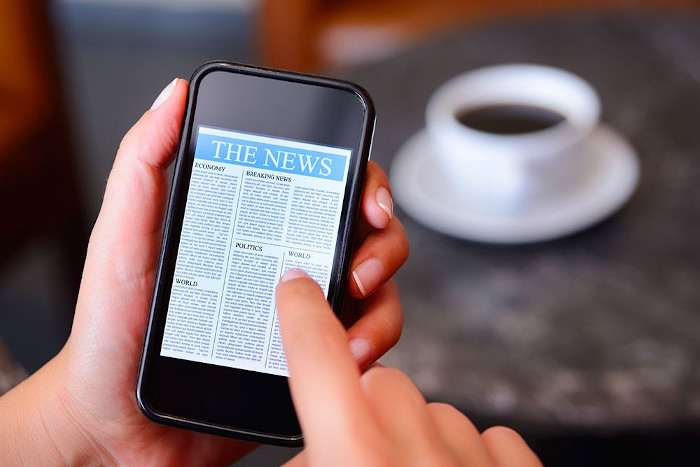



Перед выполнением задания обязательно посмотрите <a href="https://mipt-stats.gitlab.io/courses/ad_fivt/bayes_classification.html">ноутбук</a> с занятия по классификации.

---

С помощью кода ниже загрузите встроенные в `sklearn` <a target="_blank" href="https://scikit-learn.org/stable/modules/generated/sklearn.datasets.fetch_20newsgroups.html#sklearn.datasets.fetch_20newsgroups">данные</a>, в которых представлены различные новостные сюжеты, разделенные на 20 тематических групп.

In [1]:
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import CountVectorizer
from collections import Counter
from collections import OrderedDict
from sklearn.naive_bayes import MultinomialNB, BernoulliNB
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

In [2]:
# удаляем заголовки и подписи
remove = ('headers', 'footers')
# зафиксируем зерно случайности
random_state = 42

# Извлекаем обучающую и тестовую части перемешивая случайным образом
data_train = fetch_20newsgroups(
    subset='train', shuffle=True, random_state=random_state, remove=remove
)
data_test = fetch_20newsgroups(
    subset='test', shuffle=True, random_state=random_state, remove=remove
)

Посмотрим на какое-нибудь сообщение

In [3]:
print(data_train['data'][21])

In article <1993Apr20.151818.4319@samba.oit.unc.edu> Scott.Marks@launchpad.unc.edu (Scott Marks) writes:
>>And of course, Mike Ramsey was (at one time) the captain in Buffalo prior to
>>being traded to Pittsburgh.  Currently, the Penguins have 3 former captains
>>and 1 real captain (Lemieux) playing for them.  They rotate the A's during the
>>season (and even the C while Mario was out).  Even Troy Loney has worn the C
>>for the Pens.
>

I think that Mike Foligno was the captain of the Sabres when he
got traded to the Leafs. Also, wasn't Rick Vaive the captain of
the Leafs when he got traded to Chicago (with Steve Thomas for
Ed Olcyzk and someone). Speaking of the Leafs, I believe that
Darryl Sittler was their captain (he'd torn the "C" off his
jersey but I think he re-claimed the captaincy later on) when he
was traded to the Flyers.

Oh yeah, of course, Gretzky was the captain of the Oilers before
he was traded wasn't he? 


Индекс тематической группы для каждого сообщения

In [4]:
data_train['target']

array([7, 4, 4, ..., 3, 1, 8])

In [5]:
# всего текстов в обучающем сете
len(data_train['target'])

11314

Названия тематических групп(их всего 20)

In [6]:
data_train['target_names']

['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc']

С помощью методов, изученных в рамках нашего курса, постройте классификатор новостных сюжетов на тематические группы. При построении классификатора **запрещено пользоваться тестовой выборкой**. Для настройки классификатора, например, выбора оптимальных гиперпараметров, можно разделить обучающую выборку на две части &mdash; непосредственно обучающую и валидационную. Первую часть использовать для непосредственного обучения, а вторую &mdash; для настройки, пытаясь по ней оптимизировать качество.

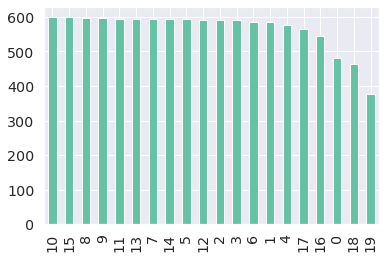

In [11]:
# посчитаем, сколько всего сообщений каждого типа
counts = pd.value_counts(data_train['target'], sort=True)
counts.plot(kind='bar');

In [12]:
# посмотрим на наиболее встречающиеся слова
all_words = []

for i in range(20):
    for j in range(len(data_train['target'])):
        if data_train['target'][j] == i:
            all_words += data_train['data'][j].lower().replace('.', '').split()
    
dict(sorted(Counter(all_words).items(), key=lambda item: -item[1]))

{'the': 134560,
 'to': 67672,
 'of': 59465,
 'a': 55968,
 'and': 51807,
 'in': 43688,
 'is': 39140,
 'i': 36343,
 'that': 34893,
 '>': 27196,
 'it': 25523,
 'for': 24665,
 'you': 21535,
 'on': 17948,
 'be': 17832,
 'this': 17364,
 'have': 16968,
 'are': 16908,
 'with': 15803,
 'not': 15798,
 'as': 14088,
 'or': 12340,
 'was': 12217,
 'if': 12029,
 'but': 11984,
 'they': 11316,
 'by': 10047,
 'from': 9750,
 'at': 9503,
 'an': 9322,
 'can': 8798,
 'will': 8428,
 'would': 8311,
 'my': 8061,
 'what': 7918,
 'there': 7668,
 'all': 7579,
 'about': 7506,
 'writes:': 7499,
 'one': 7455,
 'do': 7334,
 '-': 7110,
 'we': 7104,
 'has': 7003,
 'he': 6963,
 'your': 6840,
 'article': 6459,
 '|>': 6423,
 'any': 6289,
 'some': 6109,
 'so': 5999,
 'who': 5754,
 'no': 5477,
 'which': 5370,
 'their': 5212,
 'out': 5200,
 'me': 5135,
 'more': 5133,
 'when': 5065,
 'were': 5044,
 "don't": 5041,
 'like': 5008,
 'just': 4993,
 'people': 4956,
 'x': 4867,
 'other': 4707,
 'get': 4547,
 'than': 4411,
 'how': 43

In [13]:
# конвертирование в dataframe
df_train = pd.DataFrame([data_train.data, data_train.target.tolist()]).T
df_train.columns = ['data', 'target']

targets = pd.DataFrame(data_train.target_names)
targets.columns=['title']

df_train = pd.merge(df_train, targets, left_on='target', right_index=True)
df_train

data target      title
0      I was wondering if anyone out there could enli...      7  rec.autos
17     I recently posted an article asking what kind ...      7  rec.autos
29     tcorkum@bnr.ca (Trevor Corkum) writes:\n>Is it...      7  rec.autos
56     an excellent automatic can be found in the sub...      7  rec.autos
64     : Ford and his automobile.  I need information...      7  rec.autos
...                                                  ...    ...        ...
11210  Secrecy in Clipper Chip\n\nThe serial number o...     11  sci.crypt
11217  Hi !\n\nI am interested in the source of FEAL ...     11  sci.crypt
11243  The actual algorithm is classified, however, t...     11  sci.crypt
11254  al@escom.COM (Al Donaldson) writes:\n>amolitor...     11  sci.crypt
11302  random@presto.UUCP (Jeff W. Hyche) writes:\n>Y...     11  sci.crypt

[11314 rows x 3 columns]

In [14]:
df_train['words'] = np.nan
for index in df_train.index:
    df_train.loc[index, 'words'] = len(df_train.loc[index, 'data'].replace('.', '').split())

In [15]:
# посчитаем, сколько в среднем слов в сообщениях каждого типа
df_train.groupby('target').mean()

words
target            
0       312.341667
1       188.270548
2       172.690355
3       169.494915
4       149.148789
5       269.381113
6       110.953846
7       187.962963
8       160.163880
9       185.964824
10      268.403333
11      336.053782
12      173.937394
13      258.550505
14      253.349073
15      332.784641
16      320.324176
17      452.331560
18      404.552688
19      313.212202

In [16]:
# посчитаем дисперсию количества слов в сообщениях каждого типа
df_train.groupby('target').std()

words
target            
0       597.163944
1       670.491066
2       257.428313
3       310.707915
4       320.681184
5       919.341551
6       164.310274
7       254.163885
8       249.433072
9       242.390037
10      605.585604
11      718.502917
12      497.380891
13      469.231169
14      463.815825
15      352.837009
16      503.893402
17      881.396934
18      821.806084
19      421.304954

In [25]:
# поделим на обучающие и валидационные данные
data_train_train, data_validate = train_test_split(df_train, test_size=0.2)

In [ ]:
x1 = np.linspace(0.01, 0.04, 5)
x2 = np.linspace(0.05, 0.15, 5)


exclude = ['the', 'to', 'of', 'a', 'and', 'in', 'is', 'i', 'that']
best_accuracy = 0
best_min = 0
best_max = 0
best_multinomial_nb = MultinomialNB()
best_vectorizer = CountVectorizer(min_df=0.01, max_df=0.05)

for min_df in x1:
    for max_df in x2:
        vectorizer = CountVectorizer(min_df=min_df, max_df=max_df, stop_words=exclude)
        vec_data_train = vectorizer.fit_transform(data_train_train.data).toarray()
        # --
        multinomial_nb = MultinomialNB()
        multinomial_nb.fit(vec_data_train, np.asarray(data_train_train.target, dtype=int))
        # validate
        vec_data_validate = vectorizer.transform(data_validate.data).toarray()
        predictions = multinomial_nb.predict(vec_data_validate)

        if accuracy_score(np.asarray(data_validate.target, dtype=int), predictions) > best_accuracy:
            best_accuracy = accuracy_score(np.asarray(data_validate.target, dtype=int), predictions)
            best_multinomial_nb = multinomial_nb
            best_vectorizer = vectorizer
            best_min = min_df
            best_max = max_df
            
round(best_accuracy, 3)

Посчитайте качество на тестовой выборке.

In [ ]:
# конвертирование в dataframe
df_test = pd.DataFrame([data_test.data, data_test.target.tolist()]).T
df_test.columns = ['data', 'target']

targets = pd.DataFrame(data_test.target_names)
targets.columns=['title']

df_test = pd.merge(df_test, targets, left_on='target', right_index=True)

In [ ]:
vec_data_test = best_vectorizer.transform(df_test['data']).toarray()
predictions = best_multinomial_nb.predict(vec_data_test)
print("Точность: {}".format(round(accuracy_score(np.asarray(df_test.target, dtype=int), predictions), 3)))

**Выводы**: В среднем новостей кажого типа примерно 600. Все новости были примерно с одинаковым количеством слов, точнее не с одинаковым, а с одинаково сильно разбросанным(у всех типов дисперсия больше среднего), поэтому метод, который мог сработать в случае с опередлением спама(в котором в среднем слов больше, чем в обычном сообщении) не сработал бы. Поэтому было решено использовать байесовский классификатор для данных с дискретными признаками.
Как и следовало ожидать, вбольше всего слов вида 'the', 'to', 'of', 'a', 'and', 'in', 'is', 'i', 'that', поэтому их лучше выбросить из рассмотрения. Также для лучшего подбора гиперпараметров я решил просто перебрать max_fd и min_fd с опеределенным шагом. Предварительно разделив данные на обучающую выборку и валидационную, я получил на ней процент угадывания почти в 69%, а на тестовой выборке в 60,5%. Я считаю это достаточно хорошим результатом, так как в отличие прмера, разобранного на лекции, у нас имеется целых 20 типов новостей.

### <font color="orange"><i>Сложная часть</i></font>

Условие <b><font color="orange">сложной части</font></b> расположено по <a href="https://mipt-stats.gitlab.io/courses/ad_fivt/task4_hard.html">ссылке</a>.